## Assignment - 1
**Name - Mohammed Abuzar Younus**<br>
**Student ID - 8903244**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('pd_speech_features.csv', skiprows=1)
df.head(7)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1


## Data Preprocessing

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


In [ ]:
# Display the first few rows of the dataset
print(df.head())

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses   
0   0       1  0.85247  0.71826  0.57227        240               239  \
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
0          0.008064            0.000087       0.00218  ...  \
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29   
0                     1.5620                     2.6445  \
1                     1.5589                     3.6107   
2          

In [ ]:
# Summary statistics for numerical features
print(df.describe())

               id      gender         PPE         DFA        RPDE   numPulses   
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000  \
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter   
count        756.000000        756.000000          756.000000    756.000000  \
mean         322.678571          0.006360            0.000383      0.002324   
std           99.402499          

In [ ]:
# check the dimensions of the dataset
print("Dimensions",df.shape)

Dimensions (756, 755)


In [ ]:
# check any missing value
print(df.isnull().sum())


id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [ ]:
df.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

## Exploratory Data Analysis (EDA)

In [ ]:
# Count unique values in the 'gender' column
print(df['gender'].value_counts())



gender
1    390
0    366
Name: count, dtype: int64


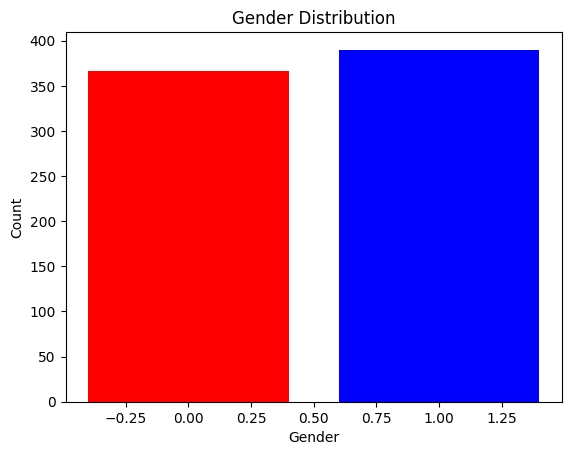

In [ ]:
# If 'gender' column contains categorical data, you can directly use the 'value_counts()' method to count occurrences
gender_counts = df['gender'].value_counts()

# Define two colors for the two genders
colors = ['blue', 'red']

# Plotting using Matplotlib
plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()




The dataset contains less than 400 records belonging to male patients and more than 350 records belonging to female patients.

**Understanding the target class's class imbalance**

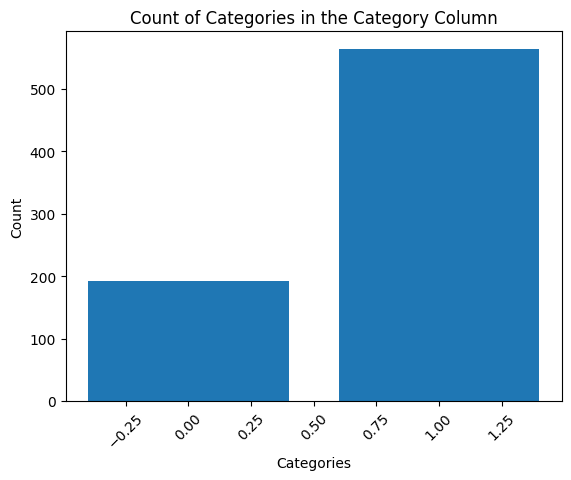

In [ ]:
# If'class' column contains categorical data, you can directly use the 'value_counts()' method to count occurrences
value_counts = df['class'].value_counts()

# Create the count plot using Matplotlib
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories in the Category Column')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

There are more than 500 occurrences in class 1 and less than 200 instances in class 0. This implies that the dataset has a class imbalance problem. As a result, while partitioning the dataset into train and test sets, we must use stratified random sampling to avoid class imbalance.

**Correlation Plot**


In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Set a reasonable figsize for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr)

# Add title
plt.title('Correlation Heatmap')

plt.show()

In [ ]:
# Handling Missing Data
# Let's assume you want to fill missing values with the mean for numerical columns.
df.fillna(df.mean(), inplace=True)
df.head(8)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1


In [ ]:
# Convert Categorical Variables (e.g., 'gender') using one-hot encoding
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class,gender_1
0,0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1,True
1,0,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1,True
2,0,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1,True
3,1,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1,False
4,1,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0,False
752,250,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0,False
753,251,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0,False
754,251,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0,False


In [ ]:
# Remove duplicate rows, keeping the first occurrence of each duplicate row
df_cleaned = df.drop_duplicates()

# Check the shape of the cleaned DataFrame to see how many duplicates were removed
print("Shape after removing duplicates:", df_cleaned.shape)


Shape after removing duplicates: (755, 755)


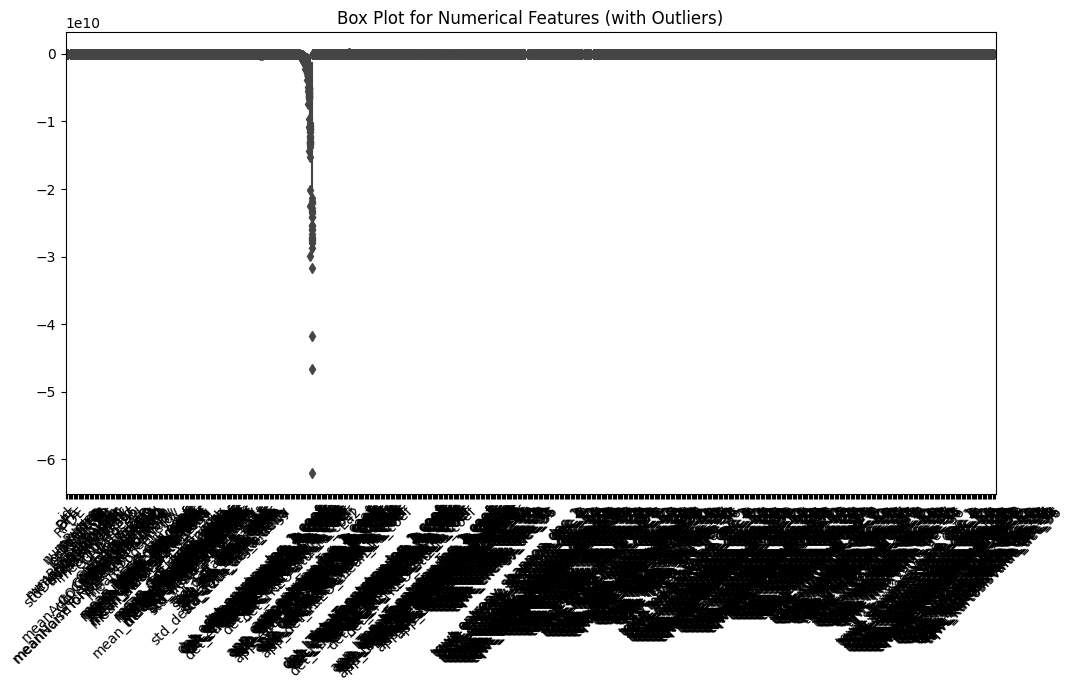

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for each numerical feature to identify outliers
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plot for Numerical Features (with Outliers)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df[numerical_features])

# Threshold for considering data points as outliers
threshold = 3

# Find the indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)

# Display rows with outliers
print(df[outlier_indices])


      id      PPE      DFA     RPDE  numPulses  numPeriodsPulses   
0      0  0.85247  0.71826  0.57227        240               239  \
1      0  0.76686  0.69481  0.53966        234               233   
2      0  0.85083  0.67604  0.58982        232               231   
3      1  0.41121  0.79672  0.59257        178               177   
4      1  0.32790  0.79782  0.53028        236               235   
..   ...      ...      ...      ...        ...               ...   
749  249  0.81171  0.79637  0.32824        336               335   
750  250  0.83172  0.57849  0.36017        375               374   
751  250  0.80903  0.56355  0.28385        417               416   
752  250  0.16084  0.56499  0.59194        415               413   
753  251  0.88389  0.72335  0.46815        381               380   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  ...   
0            0.008064            0.000087       0.00218      0.000018  ...  \
1            0.008258      

In [ ]:
# Select only the numerical columns for outlier removal
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Remove outliers using the IQR method
outliers_removed_df = df[~((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", outliers_removed_df.shape)

Shape after removing outliers: (0, 755)


In [ ]:
outliers_removed_df
df

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class,gender_1
0,0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1,True
1,0,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1,True
2,0,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1,True
3,1,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1,False
4,1,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0,False
752,250,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0,False
753,251,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0,False
754,251,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0,False


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Separate the Features (X) and the Target Variable (y)
X = df.drop(columns=['class'])  # Drop the target variable 'class'
y = df['class']

# Standardize the numerical features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# The resulting X_standardized will have all numerical features standardized (zero mean and unit variance).
X_standardized

array([[-1.72519117,  0.62764391,  0.2561442 , ..., -0.81472704,
        -0.36659507,  0.96874225],
       [-1.72519117,  0.12161952, -0.08043329, ..., -0.58297219,
         0.40039616,  0.96874225],
       [-1.72519117,  0.61795018, -0.34983882, ..., -0.8043897 ,
        -0.7809355 ,  0.96874225],
       ...,
       [ 1.72519117,  0.81336154,  0.3292009 , ..., -0.79017671,
        -0.77287314, -1.03226633],
       [ 1.72519117,  0.54105055,  0.69591966, ..., -0.82631929,
        -0.81173208, -1.03226633],
       [ 1.72519117,  0.3945807 ,  0.92284035, ..., -0.84098293,
        -0.82811405, -1.03226633]])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Model Training using SVM with RBF kernel
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8618421052631579
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.47      0.63        38
           1       0.85      0.99      0.91       114

    accuracy                           0.86       152
   macro avg       0.90      0.73      0.77       152
weighted avg       0.87      0.86      0.84       152



In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8618421052631579
